# Mezcal drops classifier
fastai image classifier of custom mezcal drop images
 
Inspired by  

*   [PyTorch Beginner Tutorial - Training an Image Classification Model and putting it online!
](https://www.youtube.com/watch?v=k1GIEkzQ8qc)
*   [Building projects with fastai - From Model Training to Deployment
](https://www.youtube.com/watch?v=pNaCrhxmN1w)

THIS VERSION IS MOSTLY BASED OFF OF THIS:
* [Image Classification with a Custom Dataset](https://walkwithfastai.com/Custom)

### Attempt #8 - 2022-02-27
Update: This worked a bit worse but it encompasses all data.
Will try to deploy **v2.pkl** and test with new images


In [4]:
#!pip install -Uqq fastbook

In [1]:
import fastbook
import fastai
from fastai.vision.widgets import *
from fastbook import *
import zipfile
import os
import datetime

In [2]:
def save_model(learner, title):
    now = datetime.datetime.now()
    timestamp = str(now.strftime("%Y%m%d_%H-%M-%S"))
    
    fname = f'{title}-{timestamp}'
    learner.save(fname)
    return fname

In [7]:
# uncomment when in Colab
"""
# new path with renamed dataset
path_to_zip_file = "data22_SNR_all.zip"
directory_to_extract_to = "data"

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
"""

'\n# new path with renamed dataset\npath_to_zip_file = "data22_SNR.zip"\ndirectory_to_extract_to = "data"\n\nwith zipfile.ZipFile(path_to_zip_file, \'r\') as zip_ref:\n    zip_ref.extractall(directory_to_extract_to)\n'

In [3]:
path = Path("data")
files = get_image_files(path)
files

(#149) [Path('data/cuishe/cuishe_20210415145251.jpg'),Path('data/cuishe/cuishe_20210415145304.jpg'),Path('data/cuishe/cuishe_20210415145307.jpg'),Path('data/cuishe/cuishe_20210415145322.jpg'),Path('data/cuishe/cuishe_20210415145326.jpg'),Path('data/cuishe/cuishe_20210415145511.jpg'),Path('data/cuishe/cuishe_20210415145549.jpg'),Path('data/cuishe/cuishe_20210415145551.jpg'),Path('data/cuishe/cuishe_20210415145555.jpg'),Path('data/cuishe/cuishe_20210415145644.jpg')...]

### Delete any corrupt images

In [4]:
classes = os.listdir("data")

imgs = L()
for n in classes:
    print(n)
    path_n = path/n
    imgs += verify_images(path_n.ls())

cuishe
espadin
pechuga
tepextate
tobala


In [5]:
imgs

(#0) []

### View Data

In [4]:
mezcal = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [5]:
dls = mezcal.dataloaders(path,  bs=9)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


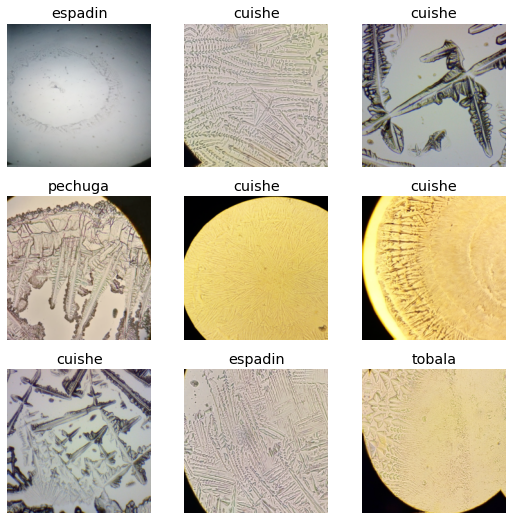

In [6]:
dls.show_batch(max_n=9)

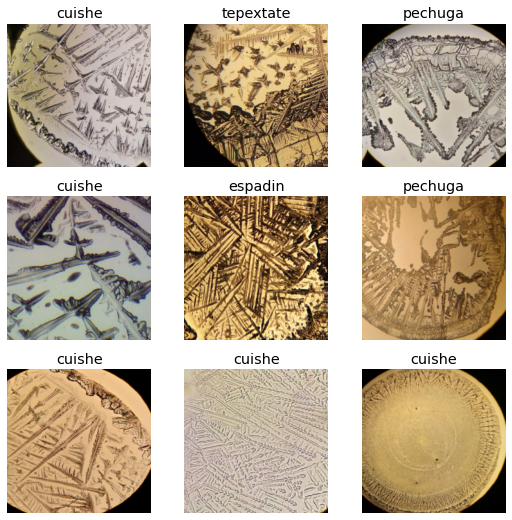

In [7]:
dls.train.show_batch()

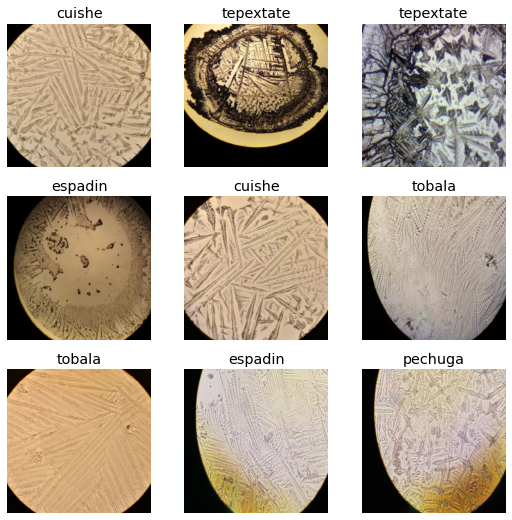

In [8]:
dls.valid.show_batch()

In [9]:
dls.vocab

['cuishe', 'espadin', 'pechuga', 'tepextate', 'tobala']

## Training

In [10]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

C:\Users\socd0\anaconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [11]:
learn.fine_tune(10)

C:\Users\socd0\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,error_rate,time
0,2.713733,1.814917,0.586207,00:32


epoch,train_loss,valid_loss,error_rate,time
0,2.023076,1.491393,0.482759,00:39
1,1.783254,1.148077,0.413793,00:37
2,1.563850,0.780938,0.206897,00:37
3,1.387609,0.855633,0.241379,00:37
4,1.217084,0.723873,0.275862,00:34
5,1.061272,0.717387,0.206897,00:34
6,1.022294,0.660653,0.172414,00:35
7,0.909552,0.658316,0.206897,00:35
8,0.797387,0.572930,0.206897,00:35
9,0.825933,0.551516,0.206897,00:34


In [13]:
model = save_model(learn, "SNR_plus")

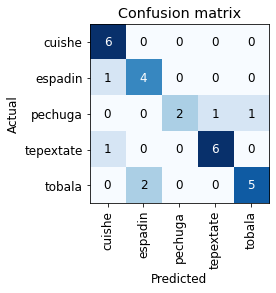

In [14]:
learn.load(model);
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

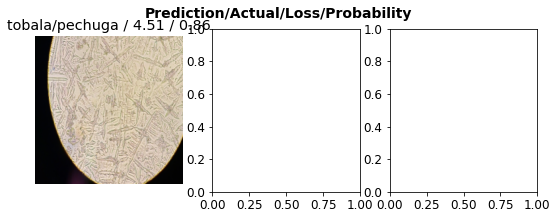

In [15]:
interp.plot_top_losses(3)

In [16]:
learn.unfreeze()

In [17]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.719810,0.569654,0.241379,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.665172,0.593075,0.206897,00:35
1,0.519096,0.512004,0.137931,00:35
2,0.640013,0.639323,0.137931,00:36
3,0.550490,0.902063,0.206897,00:35
4,0.632634,0.827151,0.206897,00:36
5,0.607086,0.816790,0.172414,00:36
6,0.547621,1.195441,0.172414,00:35
7,0.501014,0.851133,0.137931,00:36
8,0.502905,1.160070,0.172414,00:35
9,0.553928,0.995266,0.172414,00:35


In [21]:
model = save_model(learn, "SNR_30e_spd")

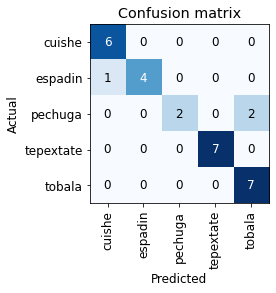

In [22]:
learn.load(model);
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

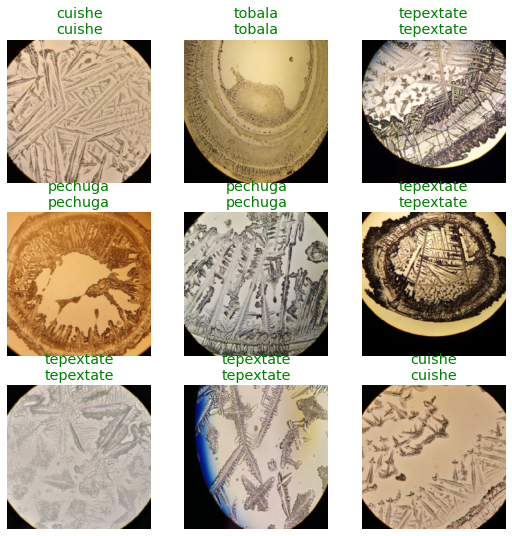

In [28]:
learn.show_results()

In [29]:
# Because we trained in fp16
learn.to_fp32()

In [31]:
learn.export("v2.pkl")

Now we have a file called "export.pkl" which we can load and make predictions with